In [105]:
# imports
import pandas as pd
import geopandas as gpd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt

# no max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [106]:
#Tables included in median_income_data:
# Median household income in the past 12 months (in 2019 inflation-adjusted dollars)


# load median income census data
median_income_data = pd.read_csv("/Users/elizabethpysher/spoke/data/census_median_household_income_2015_2019/nhgis0005_ds244_20195_tract.csv", encoding = "ISO-8859-1")

In [107]:
# check shape of median income
median_income_data.shape

(74001, 46)

In [108]:
median_income_data.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,CONCITA,AIANHHA,RES_ONLYA,TRUSTA,AIHHTLI,AITS,ANRCA,CBSAA,CSAA,METDIVA,MEMI,NECTAA,CNECTAA,NECTADIVA,UAA,CDCURRA,SLDUA,SLDLA,ZCTA5A,SUBMCDA,SDELMA,SDSECA,SDUNIA,UR,PCI,PUMA5A,GEOID,BTTRA,BTBGA,NAME_E,ALW1E001,NAME_M,ALW1M001
0,G0100010020100,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020100,NaN,NaN,"Census Tract 201, Autauga County, Alabama",60208.0,"Census Tract 201, Autauga County, Alabama",7147.0
1,G0100010020200,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020200,NaN,NaN,"Census Tract 202, Autauga County, Alabama",43958.0,"Census Tract 202, Autauga County, Alabama",7225.0
2,G0100010020300,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020300,NaN,NaN,"Census Tract 203, Autauga County, Alabama",55345.0,"Census Tract 203, Autauga County, Alabama",6773.0
3,G0100010020400,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020400,NaN,NaN,"Census Tract 204, Autauga County, Alabama",59663.0,"Census Tract 204, Autauga County, Alabama",9182.0
4,G0100010020500,2015-2019,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,NaN,20500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US01001020500,NaN,NaN,"Census Tract 205, Autauga County, Alabama",66108.0,"Census Tract 205, Autauga County, Alabama",13235.0


In [109]:
# check datatypes
median_income_data.dtypes

GISJOIN       object
YEAR          object
STUSAB        object
REGIONA      float64
DIVISIONA    float64
STATE         object
STATEA         int64
COUNTY        object
COUNTYA        int64
COUSUBA      float64
PLACEA       float64
TRACTA         int64
BLKGRPA      float64
CONCITA      float64
AIANHHA      float64
RES_ONLYA    float64
TRUSTA       float64
AIHHTLI      float64
AITS         float64
ANRCA        float64
CBSAA        float64
CSAA         float64
METDIVA      float64
MEMI         float64
NECTAA       float64
CNECTAA      float64
NECTADIVA    float64
UAA          float64
CDCURRA      float64
SLDUA        float64
SLDLA        float64
ZCTA5A       float64
SUBMCDA      float64
SDELMA       float64
SDSECA       float64
SDUNIA       float64
UR           float64
PCI          float64
PUMA5A       float64
GEOID         object
BTTRA        float64
BTBGA        float64
NAME_E        object
ALW1E001     float64
NAME_M        object
ALW1M001     float64
dtype: object

In [110]:
 # information from code book:
#  TRACTA:       Census Tract Code
#  BLKGRPA:      Block Group Code
#  ZCTA5A:       5-Digit ZIP Code Tabulation Area Code
#  GEOID:        Census Geographic Identifier
#  ALW1E001:    Median household income in the past 12 months (in 2019 inflation-adjusted dollars)


# filter to desired columns
cols = ['STATE','COUNTY','STATEA','COUNTYA','TRACTA','ALW1E001']

# only include rows in New York State (ID 36) and New York County (ID 61)
rows = (median_income_data['STATEA']==36) & (median_income_data['COUNTYA']==61)

# create df with ny data and desired columns
ny_county_data = median_income_data.loc[rows,cols]

# check that state is only ny
assert set(ny_county_data['STATE'])== {'New York'}

# check that county is only ny
assert set(ny_county_data['COUNTY']) == {'New York County'}

In [111]:
# rename Median household income column
ny_county_data = ny_county_data.rename(columns = {'TRACTA':'CENSUS_TRACT','ALW1E001':'MEDIAN_HOUSEHOLD_INCOME'})

In [112]:
# see how many nulls in columns
ny_county_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 45583 to 45870
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    288 non-null    object 
 1   COUNTY                   288 non-null    object 
 2   STATEA                   288 non-null    int64  
 3   COUNTYA                  288 non-null    int64  
 4   CENSUS_TRACT             288 non-null    int64  
 5   MEDIAN_HOUSEHOLD_INCOME  278 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 15.8+ KB


In [113]:
# check TRACTA is unique key
assert ny_county_data.shape[0]==len(set(ny_county_data['CENSUS_TRACT']))

In [114]:
# create smaller df with only desired columns (as copy)
ny_county_slim = ny_county_data[['CENSUS_TRACT', 'MEDIAN_HOUSEHOLD_INCOME']].copy()

# check head
ny_county_slim.head()

,CENSUS_TRACT,MEDIAN_HOUSEHOLD_INCOME
45583,100,NaN
45584,201,29500.0
45585,202,35466.0
45586,500,NaN
45587,600,16600.0


In [115]:
# look at dataframe
ny_county_slim.describe()

,CENSUS_TRACT,MEDIAN_HOUSEHOLD_INCOME
count,288.000000,278.000000
mean,14288.555556,99467.438849
std,8313.542304,55293.510684
min,100.000000,14144.000000
25%,7375.000000,51953.250000
50%,14401.500000,95900.000000
75%,20925.750000,137621.500000
max,31900.000000,250001.000000


In [116]:
# check how many rows with zero or nan
print("rows missing MEDIAN_HOUSEHOLD_INCOME: ", sum(ny_county_slim['MEDIAN_HOUSEHOLD_INCOME']<10))
print("rows with nan MEDIAN_HOUSEHOLD_INCOME: ", sum(ny_county_slim['MEDIAN_HOUSEHOLD_INCOME'].isnull()))

# look at zero race and income data
nan_income = ny_county_slim.loc[ny_county_slim['MEDIAN_HOUSEHOLD_INCOME'].isnull(),:]
nan_income

#to replace nan with zero:
# 100 is 1.00 Statue of Liberty & Ellis Island
# 500 is 5.00 Governors Island
# 8602 is 86.02 East River
# 14300 is Central Park
# 217.03 is CCNY Campus and Park
# 24000 is Randalls Island
# 29700 is Inwood
# 31100 is East River
# 31900 is Battery Park

ny_county_slim['MEDIAN_HOUSEHOLD_INCOME'] = ny_county_slim['MEDIAN_HOUSEHOLD_INCOME'].fillna(0)

# see how many nulls in columns
ny_county_data.info()

#weird, need to examine:
# 102 is East 49th to E 56th between Park and 5th Avenue

rows missing MEDIAN_HOUSEHOLD_INCOME:  0
rows with nan MEDIAN_HOUSEHOLD_INCOME:  10
<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 45583 to 45870
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE                    288 non-null    object 
 1   COUNTY                   288 non-null    object 
 2   STATEA                   288 non-null    int64  
 3   COUNTYA                  288 non-null    int64  
 4   CENSUS_TRACT             288 non-null    int64  
 5   MEDIAN_HOUSEHOLD_INCOME  278 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 15.8+ KB


In [117]:
# look into tract 102... very weird since it has income data in the other table
# 102 is Midtown-Midtown South (East 49th to E 56th between Park and 5th Avenue)
#data from household income table
# 100000_TO_124999	125000_TO_149999	150000_TO_199999	200000_OR_MORE	10000_TO_24999	25000_TO_49999	50000_TO_99999
# 8	18	0	4	26	0	5

ny_county_data.loc[ny_county_data['CENSUS_TRACT']==10200,:]

,STATE,COUNTY,STATEA,COUNTYA,CENSUS_TRACT,MEDIAN_HOUSEHOLD_INCOME
45684,New York,New York County,36,61,10200,NaN


In [118]:
# check shape
ny_county_slim.shape

(288, 2)

In [119]:
# load census tracts map
# obtained from https://data.cityofnewyork.us/City-Government/2010-Census-Tracts/fxpq-c8ku
tract_gdf = gpd.read_file('../../data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')

In [120]:
# check shape
tract_gdf.shape

(2165, 12)

In [121]:
# create only Manhattan
ny_county_tracts_gdf = tract_gdf.loc[tract_gdf['boro_name']=='Manhattan'].copy()

# check shape
ny_county_tracts_gdf.shape

(288, 12)

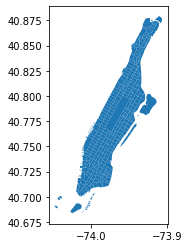

In [122]:
#plot tracts
ax = ny_county_tracts_gdf.plot()

In [123]:
# check crs
ny_county_tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [124]:
# check format of census shape file key
set(ny_county_tracts_gdf['ct2010'])

{'000100',
 '000201',
 '000202',
 '000500',
 '000600',
 '000700',
 '000800',
 '000900',
 '001001',
 '001002',
 '001200',
 '001300',
 '001401',
 '001402',
 '001501',
 '001502',
 '001600',
 '001800',
 '002000',
 '002100',
 '002201',
 '002202',
 '002400',
 '002500',
 '002601',
 '002602',
 '002700',
 '002800',
 '002900',
 '003001',
 '003002',
 '003100',
 '003200',
 '003300',
 '003400',
 '003601',
 '003602',
 '003700',
 '003800',
 '003900',
 '004000',
 '004100',
 '004200',
 '004300',
 '004400',
 '004500',
 '004700',
 '004800',
 '004900',
 '005000',
 '005200',
 '005400',
 '005501',
 '005502',
 '005600',
 '005700',
 '005800',
 '005900',
 '006000',
 '006100',
 '006200',
 '006300',
 '006400',
 '006500',
 '006600',
 '006700',
 '006800',
 '006900',
 '007000',
 '007100',
 '007200',
 '007300',
 '007400',
 '007500',
 '007600',
 '007700',
 '007800',
 '007900',
 '008000',
 '008100',
 '008200',
 '008300',
 '008400',
 '008601',
 '008602',
 '008603',
 '008700',
 '008800',
 '008900',
 '009000',
 '009100',

In [125]:
# check format of census data key
set(ny_county_slim['CENSUS_TRACT'])

{100,
 201,
 202,
 500,
 600,
 700,
 800,
 900,
 1001,
 1002,
 1200,
 1300,
 1401,
 1402,
 1501,
 1502,
 1600,
 1800,
 2000,
 2100,
 2201,
 2202,
 2400,
 2500,
 2601,
 2602,
 2700,
 2800,
 2900,
 3001,
 3002,
 3100,
 3200,
 3300,
 3400,
 3601,
 3602,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4700,
 4800,
 4900,
 5000,
 5200,
 5400,
 5501,
 5502,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8601,
 8602,
 8603,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900,
 10000,
 10100,
 10200,
 10300,
 10400,
 10601,
 10602,
 10800,
 10900,
 11000,
 11100,
 11201,
 11202,
 11203,
 11300,
 11401,
 11402,
 11500,
 11600,
 11700,
 11800,
 11900,
 12000,
 12100,
 12200,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 13200,
 13300,
 13400,
 13500,
 13600,
 13700,
 13

In [126]:
# update census tract file key format to string
ny_county_tracts_gdf['ct2010'] = ny_county_tracts_gdf['ct2010'].apply(str)

# update  census data key format to match census shape file key format
ny_county_slim['CENSUS_TRACT'] = ny_county_slim['CENSUS_TRACT'].apply(str)
ny_county_slim['CENSUS_TRACT'] = ny_county_slim['CENSUS_TRACT'].apply(lambda x: x.zfill(6))

# check keys are the same format and values before joining
set(ny_county_tracts_gdf['ct2010']) == set(ny_county_slim['CENSUS_TRACT'])

True

In [127]:
# join on census tract ID
tracts_census_data = ny_county_tracts_gdf.merge(ny_county_slim, how='inner', left_on='ct2010',right_on='CENSUS_TRACT')

# check shape
tracts_census_data.shape

(288, 14)

In [128]:
# check head
income_check = tracts_census_data.sort_values('MEDIAN_HOUSEHOLD_INCOME',ascending=False)
income_check.tail(11)

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,MEDIAN_HOUSEHOLD_INCOME
254,1,1002400,Manhattan,E,002400,24,MN28,Lower East Side,3809,1.862478e+06,9194.919307,"MULTIPOLYGON (((-73.96715 40.71832, -73.96656 ...",002400,14144.0
158,1,1024000,Manhattan,I,024000,240,MN99,park-cemetery-etc-Manhattan,3804,2.346654e+07,24946.238144,"POLYGON ((-73.92719 40.79735, -73.92720 40.797...",024000,0.0
1,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",010200,0.0
269,1,1031100,Manhattan,I,031100,311,MN99,park-cemetery-etc-Manhattan,3801,7.740632e+06,27348.123947,"POLYGON ((-73.92234 40.85568, -73.92230 40.855...",031100,0.0
25,1,1000100,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047902,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",000100,0.0
170,1,1000500,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.083215e+06,32642.083526,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",000500,0.0
176,1,1021703,Manhattan,I,021703,217.03,MN06,Manhattanville,3802,3.384698e+06,9422.075528,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",021703,0.0
188,1,1029700,Manhattan,I,029700,297,MN99,park-cemetery-etc-Manhattan,3801,9.971006e+06,20512.573476,"MULTIPOLYGON (((-73.92641 40.87762, -73.92635 ...",029700,0.0
283,1,1014300,Manhattan,I,014300,143,MN99,park-cemetery-etc-Manhattan,3806,3.831238e+07,32721.097913,"POLYGON ((-73.95246 40.79824, -73.95237 40.798...",014300,0.0
223,1,1008602,Manhattan,I,008602,86.02,MN19,Turtle Bay-East Midtown,3808,1.071406e+06,4967.851082,"MULTIPOLYGON (((-73.96421 40.74660, -73.96427 ...",008602,0.0


<AxesSubplot:>

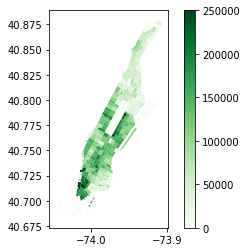

In [129]:
tracts_census_data.plot(column='MEDIAN_HOUSEHOLD_INCOME', cmap='Greens',legend=True)

In [130]:
# save csv with race and income data and census tracts
tracts_census_data.to_csv(path_or_buf='../../data/census_median_income_clean.csv')